<a href="https://colab.research.google.com/github/veiro/tesis-imputacion-datos/blob/main/codigo/prediccion/pruebas_prediccion/Prueba_de_prediccion_categorico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Utilizar el mejor modelo encontrado para predecir un categorico

# Configuracion ambiente

In [ ]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = False

In [ ]:
!pip install "pandas<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install "joblib==1.3.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


In [ ]:
!pip install "pycaret==3.3.0."

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.

In [ ]:
import os
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from google.colab import drive
#from ydata_profiling import ProfileReport

from datetime import datetime
# para hacer pruebas bajo la cantidad


In [ ]:
if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"
  sys.path.append('/content/gdrive/MyDrive/Maestria/Tesis/Codigo/utils')
else:
  PATH_DATA_PROCESADA = "data/data-procesada"

import utils as utils
import importlib
importlib.reload(utils)

if (30 ==  utils.version()):
  print("version correcta")
else:
  raise Exception("Version de Util vieja")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
version correcta


# Utils

In [ ]:
resultados = pandas.DataFrame()

In [ ]:
from pycaret.classification import *

def prediccionCategorico(files):
  global resultados
  ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'clsificacion_Country_Region_Desarrollo=False'
  loaded_best_pipeline = load_model(ruta_modelo)

  for fp in  files:
    print(fp)
    data_full = pandas.read_csv(PATH_DATA_PROCESADA+'/'+fp)
    if(MODO_DESARROLLO):
      data_sin_null =  data_full.sample(n=50000, random_state=1,replace=True) # en el caso de desarrollo subi n=50000 por que sino la clase 'Country_Region' carga pocos valores
    else:
      data_sin_null = data_full

      target_variable = 'Country_Region'

      class_counts = data_sin_null[target_variable].value_counts()

    s = setup(data_sin_null, target = 'Country_Region', session_id = 123, use_gpu = True, verbose = False,index=False )
    prediction = predict_model(loaded_best_pipeline, data = data_sin_null)
    salida = pull()
    salida.insert(0, "Dataset", utils.prettyPrintName(fp), allow_duplicates=False)
    resultados = pandas.concat([resultados, salida], axis=0)
    del data_full
    del s
    del salida
    print("----------------------------------------------------------------")


# Prueba de prediccion categorico


In [ ]:
%%time
files=[
       'csse_covid_19_data_strategy=constant_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=most_frequent_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=mean_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=median_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_strategy=IterativeImputer_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_MIDASpy_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_GAIN._Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_Transformer_final_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_XGBoost_full_Desarrollo='+str(MODO_DESARROLLO)+'.csv',
       'csse_covid_19_data_Knn_full_Desarrollo='+str(MODO_DESARROLLO)+'.csv']

resultados = pandas.DataFrame()
prediccionCategorico(files)

Transformation Pipeline and Model Successfully Loaded
csse_covid_19_data_strategy=constant_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided c

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6176,0.8025,0.6176,0.9512,0.7367,0.2529,0.3421


----------------------------------------------------------------
csse_covid_19_data_strategy=most_frequent_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisf

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6190,0.7999,0.6190,0.9530,0.7417,0.2535,0.3452


----------------------------------------------------------------
csse_covid_19_data_strategy=mean_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the pro

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9412,0.9001,0.9412,0.9467,0.9407,0.7589,0.7605


----------------------------------------------------------------
csse_covid_19_data_strategy=median_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the p

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9367,0.8937,0.9367,0.9461,0.9399,0.7149,0.7157


----------------------------------------------------------------
csse_covid_19_data_strategy=IterativeImputer_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which sat

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9621,0.9736,0.9621,0.9687,0.9641,0.8553,0.8556


----------------------------------------------------------------
csse_covid_19_data_MIDASpy_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9492,0.9597,0.9492,0.9571,0.9513,0.8044,0.8046


----------------------------------------------------------------
csse_covid_19_data_GAIN._Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided co

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9404,0.9212,0.9404,0.9505,0.9443,0.7397,0.7418


----------------------------------------------------------------
csse_covid_19_data_Transformer_final_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9739,0.9815,0.9739,0.9773,0.9750,0.9004,0.9007


----------------------------------------------------------------
csse_covid_19_data_XGBoost_full_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9626,0.9714,0.9626,0.9722,0.9649,0.8581,0.8583


----------------------------------------------------------------
csse_covid_19_data_Knn_full_Desarrollo=False.csv
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9768,0.9735,0.9768,0.9773,0.9761,0.9100,0.9101


----------------------------------------------------------------
CPU times: user 8min 5s, sys: 10.2 s, total: 8min 16s
Wall time: 8min 30s


In [ ]:
resultados

,Dataset,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,constant,Decision Tree Classifier,0.6176,0.8025,0.6176,0.9512,0.7367,0.2529,0.3421
0,most_frequent,Decision Tree Classifier,0.6190,0.7999,0.6190,0.9530,0.7417,0.2535,0.3452
0,mean,Decision Tree Classifier,0.9412,0.9001,0.9412,0.9467,0.9407,0.7589,0.7605
0,median,Decision Tree Classifier,0.9367,0.8937,0.9367,0.9461,0.9399,0.7149,0.7157
0,IterativeImputer,Decision Tree Classifier,0.9621,0.9736,0.9621,0.9687,0.9641,0.8553,0.8556
0,MIDASpy,Decision Tree Classifier,0.9492,0.9597,0.9492,0.9571,0.9513,0.8044,0.8046
0,GAIN,Decision Tree Classifier,0.9404,0.9212,0.9404,0.9505,0.9443,0.7397,0.7418
0,Transformer,Decision Tree Classifier,0.9739,0.9815,0.9739,0.9773,0.9750,0.9004,0.9007
0,XGBoost,Decision Tree Classifier,0.9626,0.9714,0.9626,0.9722,0.9649,0.8581,0.8583
0,Knn,Decision Tree Classifier,0.9768,0.9735,0.9768,0.9773,0.9761,0.9100,0.9101


In [ ]:
datos = {
    'Accuracy': [1.0000],
    'AUC': [1.0000],
    'Recall': [1.0000],
    'Prec.': [1.0000],
    'F1': [1.0000],
    'Kappa': [1.0000],
    'MCC': [1.0000],
    'Dataset' : "Original"
}

salida_orginal = pandas.DataFrame(datos)
resultados = pandas.concat([resultados, salida_orginal], axis=0)

<Axes: xlabel='Dataset'>

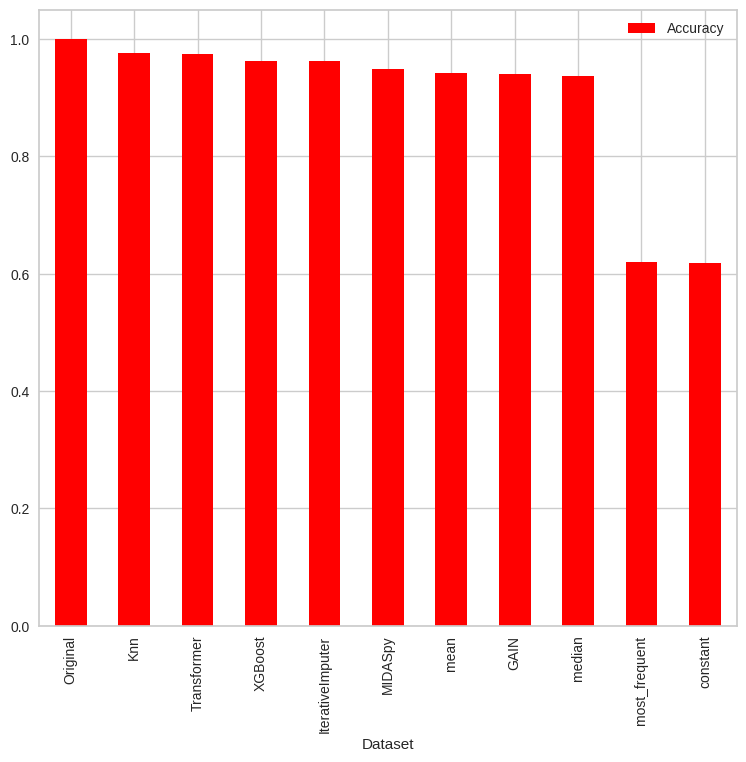

In [ ]:
resultados.sort_values(by=['Accuracy'], ascending=False).plot(x='Dataset', y=["Accuracy"], kind="bar", figsize=(9, 8), color='red')

<Axes: xlabel='Dataset'>

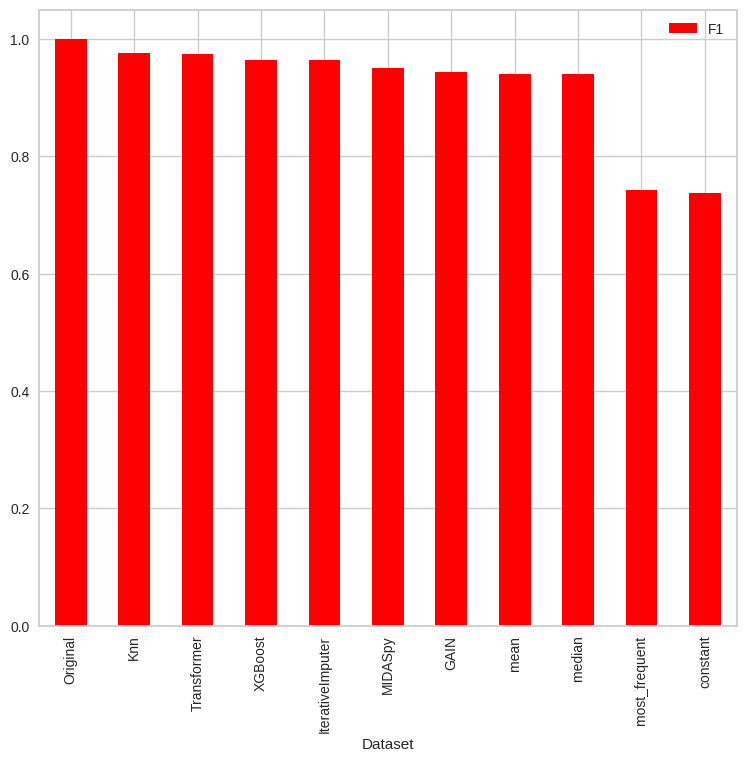

In [ ]:
resultados.sort_values(by=['F1'], ascending=False).plot(x='Dataset', y=["F1"], kind="bar", figsize=(9, 8), color='red')

<Axes: xlabel='Dataset'>

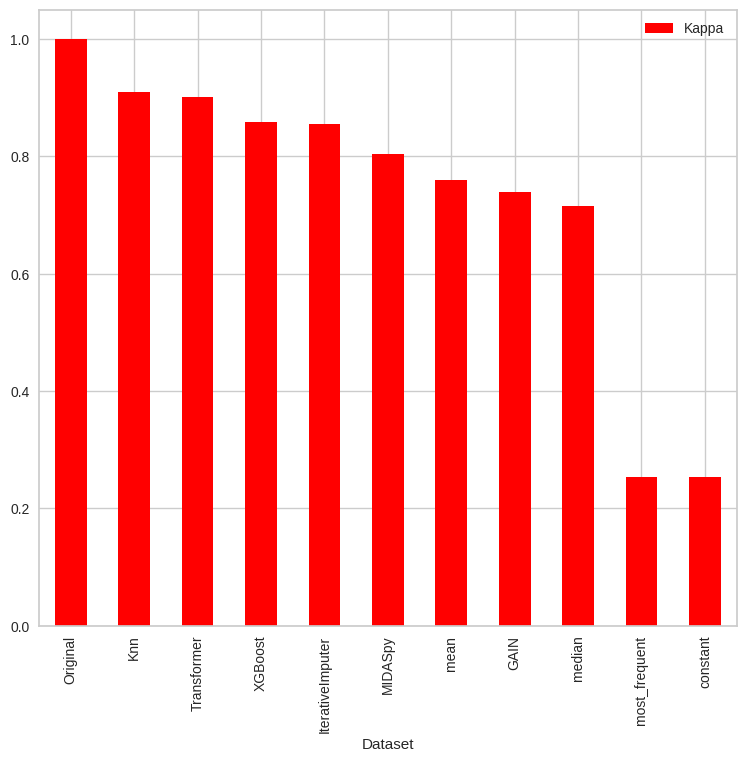

In [ ]:
resultados.sort_values(by=['Kappa'], ascending=False).plot(x='Dataset', y=["Kappa"], kind="bar", figsize=(9, 8), color='red')

https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico

Exactitud = (TP+TN)/total

Cuando nuestras clases son aproximadamente iguales en tamaño, podemos usar la precisión, que nos dará valores clasificados correctamente.

No es el caso.



Precisión=TP/predicciones sí

Cuando tenemos un desequilibrio de clase, la precisión puede convertirse en una métrica poco fiable para medir nuestro desempeño.


-------------------------

Recall  = Tasa positiva verdadera = TP/Si reales


----------------


El puntaje F1 es el promedio ponderado de precisión y recall. Por lo tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos.Es especialmente útil en modelos con clases desbalanceadas


su mejor valor en 1 (precisión y exhaustividad perfectas) y el peor en 0.

------------

kappa

La Kappa de Cohen es una medida de concordancia entre dos muestras categóricas dependientes,

Kappa
>0.8	Casi perfecto
>0.6	Sustancial
>0.4	Moderado
>0.2	Regular
0-0.2	Ligero
<0	Deficiente